In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from sklearn.preprocessing import StandardScaler
import pandas as pd # for loading the Excel data set file

df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
data = df.to_numpy()

N= 200

X = data[:N,:8]
y = data[:N,8]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [2]:
def mini_batch_gradient(batch_size, n_epochs, lr):
    Nb = batch_size
    J_w = []
    #beta = np.random.randint(0, 30, size = len(X[0])+1, )
    beta = np.zeros(shape = (len(X[0])+1, ))
    for k in range(n_epochs):
        ids = list(np.arange(0, N))
        for n in range(int(N/Nb)):
            batch_ids = random.sample(ids, Nb)
            ids = [x for x in ids if x not in batch_ids]
            X_b = np.array([X[i] for i in batch_ids])   
            y_b = np.array([y[i] for i in batch_ids])   
            X_mat = np.ones(shape = (len(y_b), len(X_b[0])+1))
            for i in range(len(X_mat)):
                for j in range(len(X_b[0])):
                    X_mat[i][j+1] = X_b[i][j]
            res = []
            for pts in X_b:
                pred = beta[0]
                for k in range(len(pts)):
                    pred+= beta[k+1]*pts[k]
                res.append(pred)
            for j in range(len(X_b)):
                beta = beta + lr * 0.25 * (y_b[j] - np.dot(beta, X_mat[j])) * X_mat[j]    
            #beta = beta + 0.2*lr*np.dot(X_mat.T, (y_b - np.dot(X_mat, beta)))
            #print(f'x = {res:.1f}')
            loss = np.mean([(y_b[i] - res[i])**2 for i in range(len(y_b))])
            #loss = X.shape[0] * np.average((y_b - res) ** 2, axis=0)
            J_w.append(loss)
        ns = np.linspace(1,len(J_w),len(J_w))*Nb
    return J_w, ns

In [3]:
def SGD(n_epochs, lr):
    beta = np.zeros(shape = (len(X[0])+1, ))
    J_w = []
    for k in range(n_epochs):
        ids = list(np.arange(0, N))
        for xx in range (len(X)):
            batch_ids = random.sample(ids, 1)
            ids = [x for x in ids if x not in batch_ids]
            indx = batch_ids[0]
            X_mat = np.ones(shape = (1, len(X[indx])+1))
            X_ , y_= X[indx], y[indx]
            for i in range(len(X_mat)):
                for j in range(len(X_)):
                    X_mat[i][j+1] = X_[j]

            pred = beta[0]
            for p in range(len(X_)):
                pred+= beta[p+1]*X_[p]
            beta = beta + lr * 2 * (y_ - np.dot(beta, X_mat[0])) * X_mat[0]
            #beta = beta + 2*lr*np.dot(X_mat.T, (y_ - np.dot(X_mat, beta)))
            loss = np.sum([(y_ - pred)**2])
            #loss = X.shape[0] * np.average((y_b - res) ** 2, axis=0)
            J_w.append(loss)
    ns = np.linspace(1,len(J_w),len(J_w))
    return J_w, ns

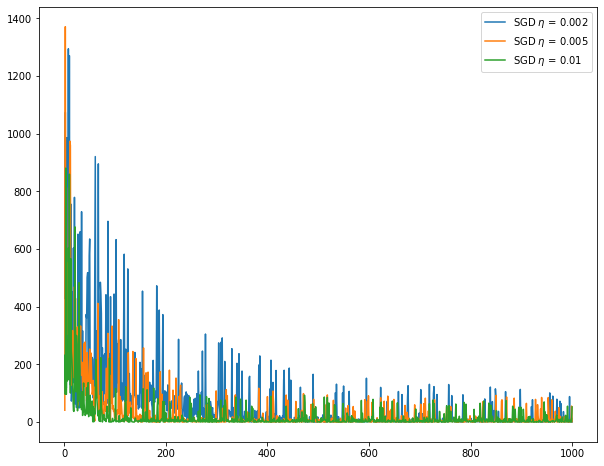

In [4]:
SGD2, x2 = SGD(5, 0.002)
SGD5, x5 = SGD(5, 0.005)
SGD10, x10 = SGD(5, 0.01)

plt.figure(figsize = (10,8))
plt.plot(x2, SGD2, label = 'SGD $\eta$ = 0.002')
plt.plot(x5, SGD5,label = 'SGD $\eta$ = 0.005')
plt.plot(x10, SGD10, label = 'SGD $\eta$ = 0.01')
plt.legend()

5 1000 100


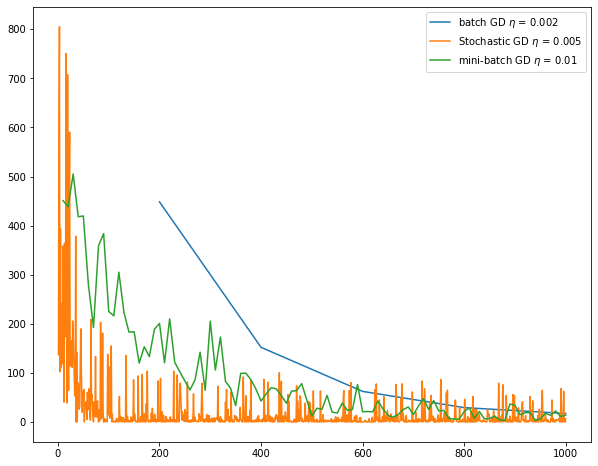

In [5]:
SGD2, x2 = mini_batch_gradient(N, 5, 0.01)
SGD5, x5 = SGD(5, 0.01)
SGD10, x10 = mini_batch_gradient(10, 5, 0.01)
print(len(x2), len(x5), len(x10))
plt.figure(figsize = (10,8))
plt.plot(x2, SGD2, label = 'batch GD $\eta$ = 0.002')
plt.plot(x5, SGD5,label = 'Stochastic GD $\eta$ = 0.005')
plt.plot(x10, SGD10, label = 'mini-batch GD $\eta$ = 0.01')
plt.legend()